# pandas index/column

- 행을 얻을때는 loc, iloc을 사용하고, 컬럼을 얻을 때는 컬럼명을 사용한다
- 열을 추가할 때에도 loc을 사용한다 (행이름 또는 행번호 방식 모두 가능)
- 컬럼을 얻을 때 [[ ]]를 사용하면 데이터프레임을 리턴한다
- 정수형 인덱스를 사용할 때는 슬라이싱에서 끝점은 포함하지 않는다
- df.iloc[: : 2] 2개의 행을 건너뛰면서 얻는다
- df.iloc[: : -1] 역순으로 얻는다
- reindex(new_index) 인덱스를 변경한다
- reset_index() 새로운 정수형 인덱스를 지정하며 기존의 인덱스는 컬럼으로 변신
- sort_index() (참고: sort_values(by='A")
- 시리즈간 연산시 같은 인덱스인 행단위로 연산을 수행한다 (한쪽이 비어있으면 nan)
- 데이터프레임간 연산시 같은 인덱스를 대상으로, 같은 커럼명끼리 연산을 수행한다 (한쪽이 비어있으면 nan)
- sr1.add(sr2, fill_value = 0)
- pd.DataFrame([sr1, sr2, sr3])

## file 읽기
- read_csv(names=column_list)
 - 옵션: skiprows = 10, skiprows = [1,2,5]
 - skip_footer = 1000
 - parse_dates
- read_json - 첫번째 딕셔너리의 키는 컬럼명으로, 두번째 딕셔너리의 키가 인덱스로 사용된다

In [30]:
x = {
#     "name":{"pandas":"",
#             "NumPy":"",
#             "matplotlib":""},
            
    "year":{"pandas":2008,
            "NumPy":2006,
            "matplotlib":2003},
            
    "developer":{"pandas":"Wes Mckinneye",
                "NumPy":"Travis Oliphant",
                "matplotlib":"John D. Hunter"},
                
    "opensource":{"pandas":"True",
                  "NumPy":"True",
                  "matplotlib":"True"}

}

In [31]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt

In [32]:
import pandas as pd

# read_json() 함수로 데이터프레임 변환 
# df = pd.read_json('file_path')  
df = pd.DataFrame(x)  
print(df)
print('\n')
print(df.index)

            year        developer opensource
pandas      2008    Wes Mckinneye       True
NumPy       2006  Travis Oliphant       True
matplotlib  2003   John D. Hunter       True


Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')


In [33]:
df.index

Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')

In [34]:
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
# df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
print(df)

# to_json() 메소드를 사용하여 JSON 파일로 내보내기. 파열명은 df_sample.json로 저장
df.to_json("./df_sample.json")

    name algol basic c++
0  Jerry     A     C  B+
1   Riah    A+     B   C
2   Paul     B    B+  C+


In [35]:
# 액셀로 저장하기 (시트)
# writer = pd.ExcelWriter("./df_excelwriter.xlsx")
# df1.to_excel(writer, sheet_name="sheet1")
# df2.to_excel(writer, sheet_name="sheet2")
# writer.save()

## 결과보기


In [36]:
import numpy as np
res = []
for i in range(5):
    for c in ["A", "B", "C"]:
        res.append([i,c,round(np.random.rand(),2)])
res
    

[[0, 'A', 0.6],
 [0, 'B', 0.7],
 [0, 'C', 0.79],
 [1, 'A', 0.76],
 [1, 'B', 0.94],
 [1, 'C', 0.01],
 [2, 'A', 0.92],
 [2, 'B', 0.78],
 [2, 'C', 0.04],
 [3, 'A', 0.73],
 [3, 'B', 0.91],
 [3, 'C', 0.63],
 [4, 'A', 0.54],
 [4, 'B', 0.72],
 [4, 'C', 0.08]]

In [37]:
import pandas as pd
df = pd.DataFrame(res, columns=["A", "B", "C"])
df

,A,B,C
0,0,A,0.60
1,0,B,0.70
2,0,C,0.79
3,1,A,0.76
4,1,B,0.94
5,1,C,0.01
6,2,A,0.92
7,2,B,0.78
8,2,C,0.04
9,3,A,0.73


## plot() kind
- line, bar, hist, box, kde, area, oie, scatter, hexbin
- 라인 옵션
 - marker, markerfacecolor, markersize
 - color, linewidth, label

<AxesSubplot:ylabel='Frequency'>

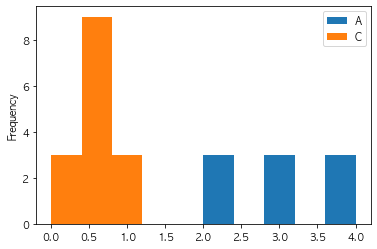

In [38]:
df.plot(kind="hist")

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'C'}>]], dtype=object)

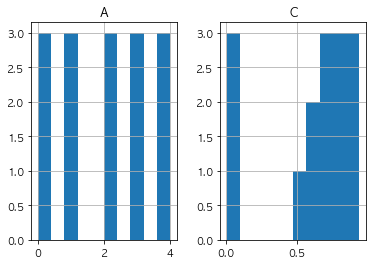

In [39]:
df.hist()

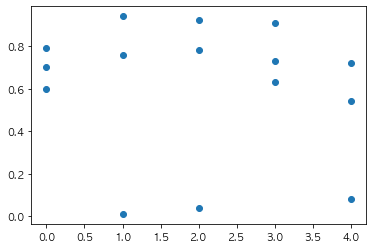

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df.A, df.C)

<AxesSubplot:xlabel='A', ylabel='C'>

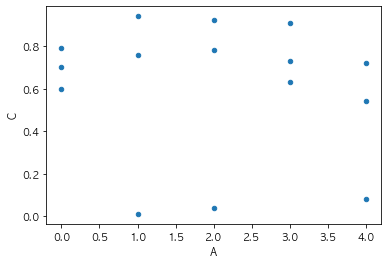

In [41]:
df.plot(x="A", y="C", kind="scatter")

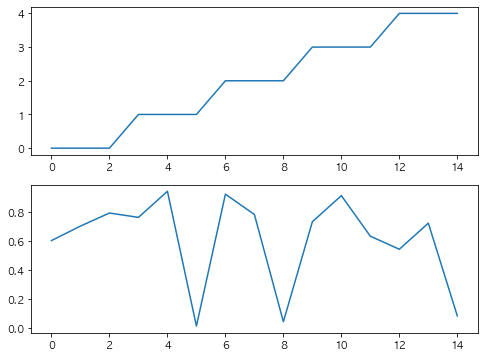

In [42]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(df.A)
ax2.plot(df.C)

In [43]:
import os

In [44]:
# 한글
import platform, matplotlib
from matplotlib import rc
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

In [45]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)
df[:10]

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,NaN,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
7,NaN,대전광역시,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
8,NaN,울산광역시,-,-,-,-,-,-,-,-,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
9,NaN,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,32784,23805,56526,83994,65052,82073


In [46]:
# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df[:10]

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,전국,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
7,전국,대전광역시,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
8,전국,울산광역시,-,-,-,-,-,-,-,-,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
9,전국,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,32784,23805,56526,83994,65052,82073


In [47]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul[:10]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [48]:
list(map(str, range(1970, 2018)))

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [49]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4[:10]

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


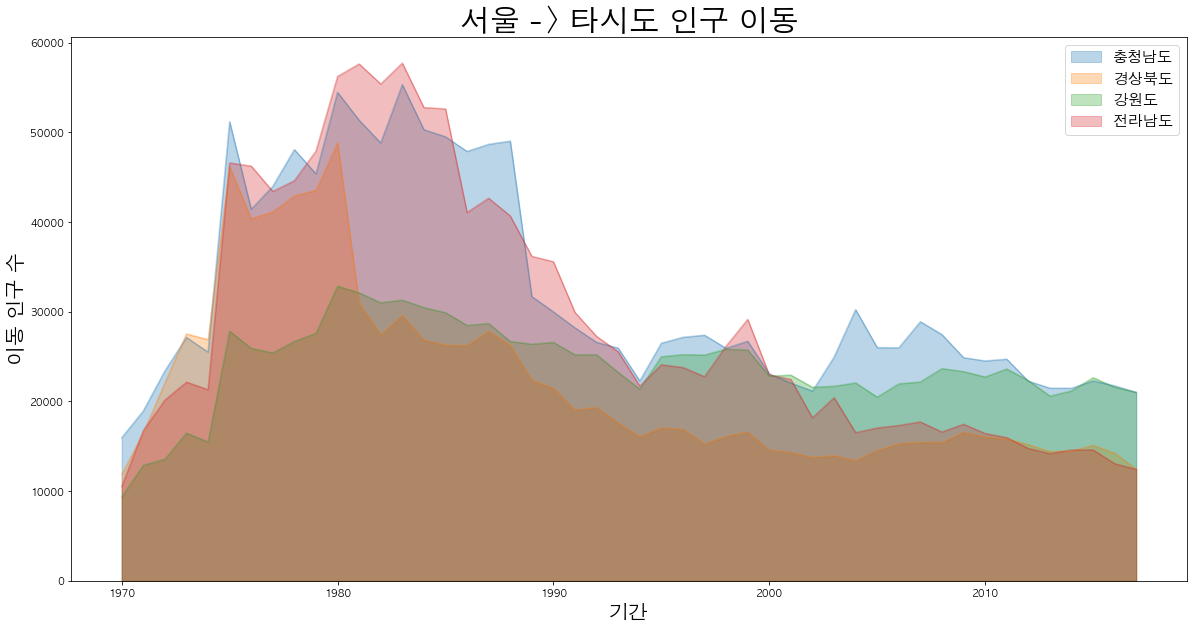

In [50]:
# 스타일 서식 지정
# plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
# df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.3, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

<AxesSubplot:>

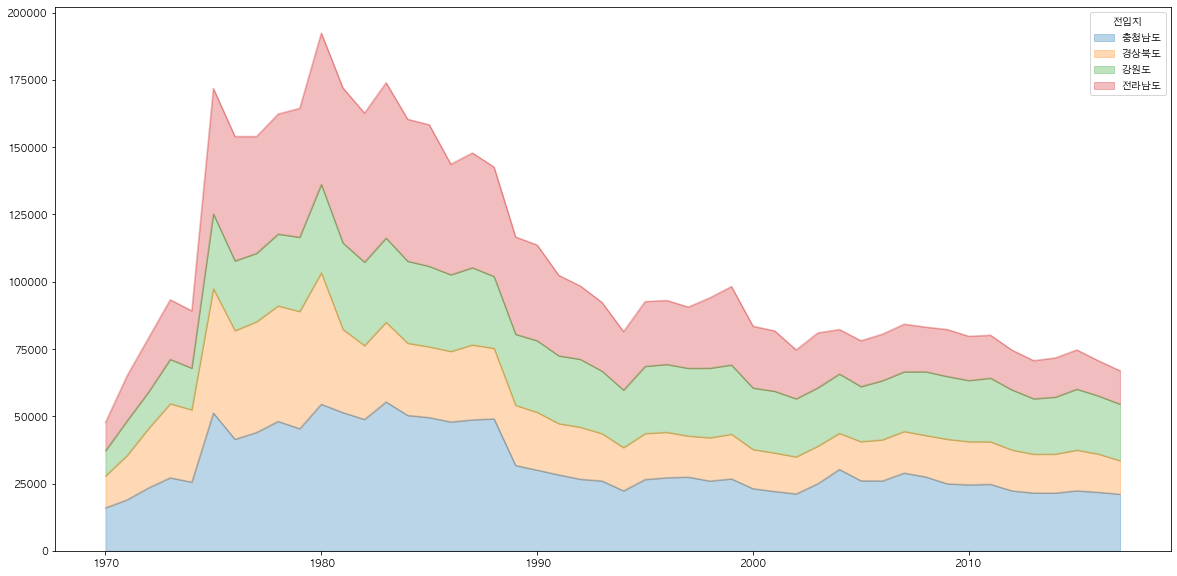

In [51]:
df_4.plot(kind='area', stacked=True, alpha=0.3, figsize=(20, 10))

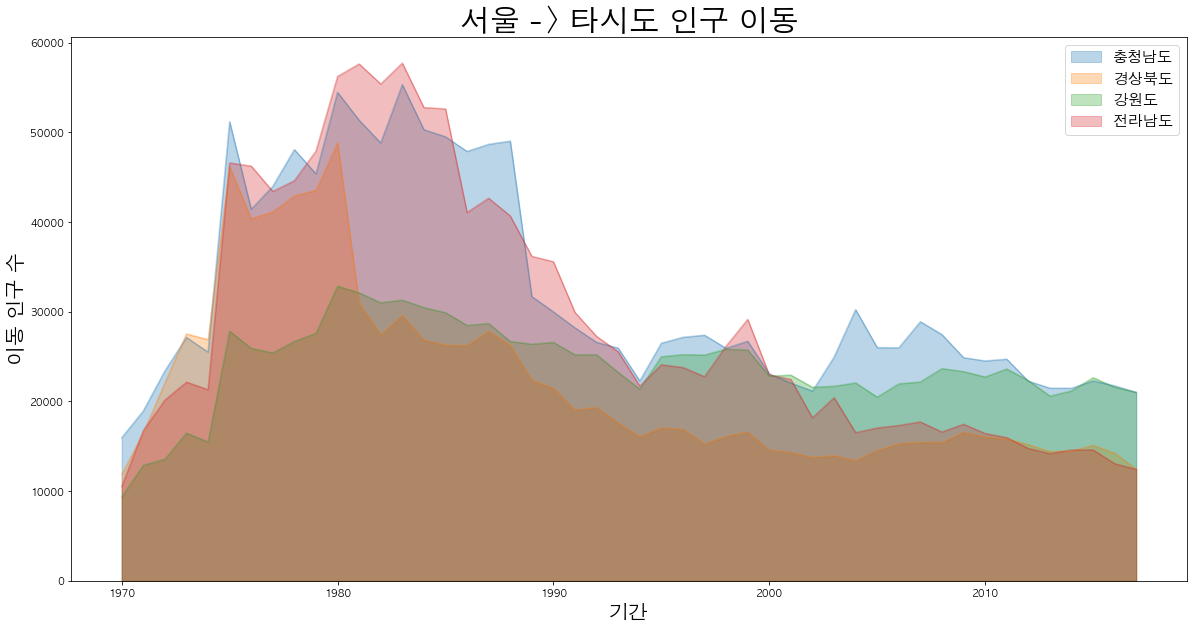

In [53]:
# axe 객체 사용하기
ax = df_4.plot(kind='area', stacked=False, alpha=0.3, figsize=(20, 10))

ax.set_title('서울 -> 타시도 인구 이동', size=30)
ax.set_ylabel('이동 인구 수', size=20)
ax.set_xlabel('기간', size=20)
ax.legend(loc='best', fontsize=15)
plt.show()

<AxesSubplot:>

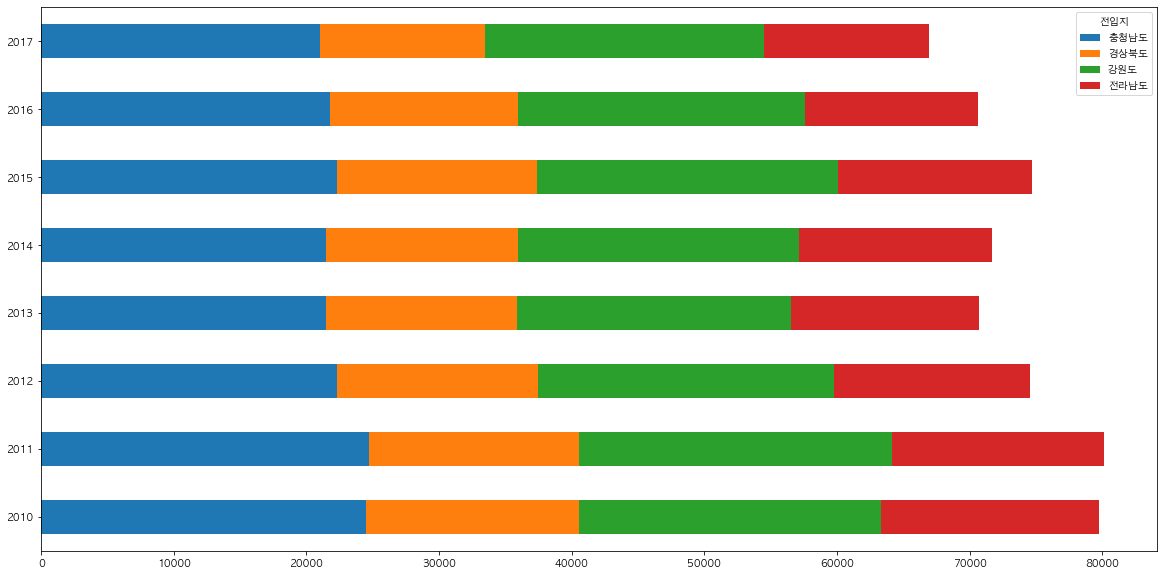

In [60]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4.plot(kind='barh', stacked=True, figsize=(20, 10))